In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf 
import warnings            
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.metrics import mean_squared_error
import datetime

In [3]:
AMZN = yf.download("AMZN", start="2003-01-01", end="2022-12-30",group_by="ticker")
print(AMZN)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2003-01-02   0.959500   0.984000   0.927500   0.978500   0.978500  129680000
2003-01-03   0.979500   1.026500   0.970500   1.026000   1.026000  175140000
2003-01-06   1.020000   1.058500   1.015000   1.035000   1.035000  153962000
2003-01-07   1.041500   1.087500   1.030000   1.077500   1.077500  191364000
2003-01-08   1.072000   1.080000   1.041000   1.051000   1.051000  139630000
...               ...        ...        ...        ...        ...        ...
2022-12-22  85.519997  85.680000  82.250000  83.790001  83.790001   81431300
2022-12-23  83.250000  85.779999  82.930000  85.250000  85.250000   57433700
2022-12-27  84.970001  85.349998  83.000000  83.040001  83.040001   57284000
2022-12-28  82.800003  83.480003  81.690002  81.820000  81.820000   58228600
2022-12

In [4]:
AMZN.to_csv('AMZN.csv')

In [5]:
amazon=pd.read_csv('AMZN.csv')

In [6]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-01-02,0.9595,0.9840,0.9275,0.9785,0.9785,129680000
1,2003-01-03,0.9795,1.0265,0.9705,1.0260,1.0260,175140000
2,2003-01-06,1.0200,1.0585,1.0150,1.0350,1.0350,153962000
3,2003-01-07,1.0415,1.0875,1.0300,1.0775,1.0775,191364000
4,2003-01-08,1.0720,1.0800,1.0410,1.0510,1.0510,139630000


In [7]:
amazon.shape

(5034, 7)

In [8]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5034 non-null   object 
 1   Open       5034 non-null   float64
 2   High       5034 non-null   float64
 3   Low        5034 non-null   float64
 4   Close      5034 non-null   float64
 5   Adj Close  5034 non-null   float64
 6   Volume     5034 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 275.4+ KB


In [9]:
amazon.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5034.000000,5034.000000,5034.000000,5034.000000,5034.000000,5.034000e+03
mean,39.249315,39.704663,38.743257,39.230133,39.230133,1.175188e+08
std,51.225764,51.825649,50.548991,51.179896,51.179896,9.435654e+07
min,0.959500,0.984000,0.927500,0.978500,0.978500,1.762600e+07
25%,3.478625,3.557875,3.418125,3.488625,3.488625,6.473550e+07
50%,12.872000,12.987500,12.731750,12.887000,12.887000,9.597600e+07
75%,59.686252,60.135249,59.366001,59.642250,59.642250,1.417735e+08
max,187.199997,188.654007,184.839493,186.570496,186.570496,2.086584e+09


In [10]:
amazon.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [11]:
amazon['Date'] = pd.to_datetime(amazon['Date'])

In [12]:
amazon['Year'] = amazon['Date'].dt.year

In [13]:
amazon.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2003-01-02,0.9595,0.9840,0.9275,0.9785,0.9785,129680000,2003
1,2003-01-03,0.9795,1.0265,0.9705,1.0260,1.0260,175140000,2003
2,2003-01-06,1.0200,1.0585,1.0150,1.0350,1.0350,153962000,2003
3,2003-01-07,1.0415,1.0875,1.0300,1.0775,1.0775,191364000,2003
4,2003-01-08,1.0720,1.0800,1.0410,1.0510,1.0510,139630000,2003


In [14]:
amazon.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
5029,2022-12-22,85.519997,85.680000,82.250000,83.790001,83.790001,81431300,2022
5030,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,2022
5031,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,2022
5032,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,2022
5033,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900,2022


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

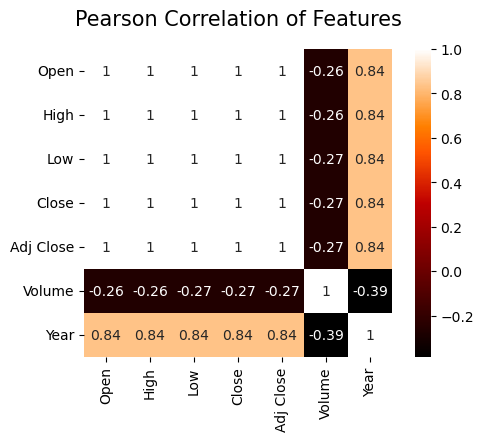

In [15]:
colormap = plt.cm.viridis
plt.figure(figsize=(6,4))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(amazon.iloc[:,[1,2,3,4,5,6,7]].astype(float).corr(),vmax=1.0, square=True,cmap="gist_heat",annot=True)

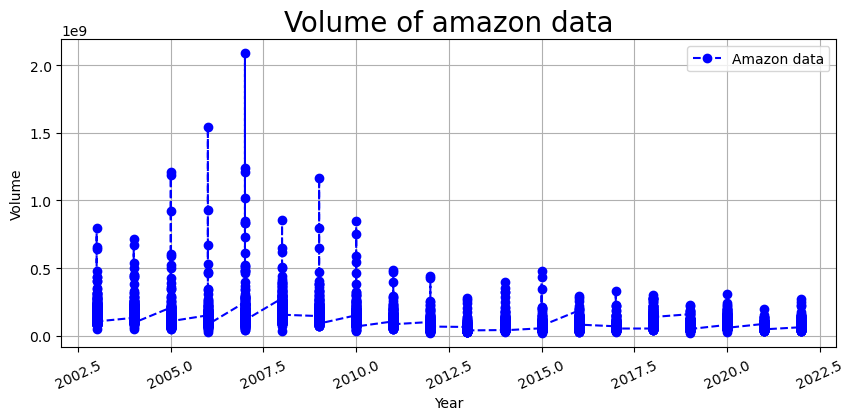

In [16]:
plt.figure(figsize =(10,4))
plt.plot(amazon['Year'], amazon["Volume"], color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Amazon data")
  
plt.xticks(rotation = 25)
plt.xlabel('Year')
plt.ylabel('Volume')
plt.title('Volume of amazon data', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

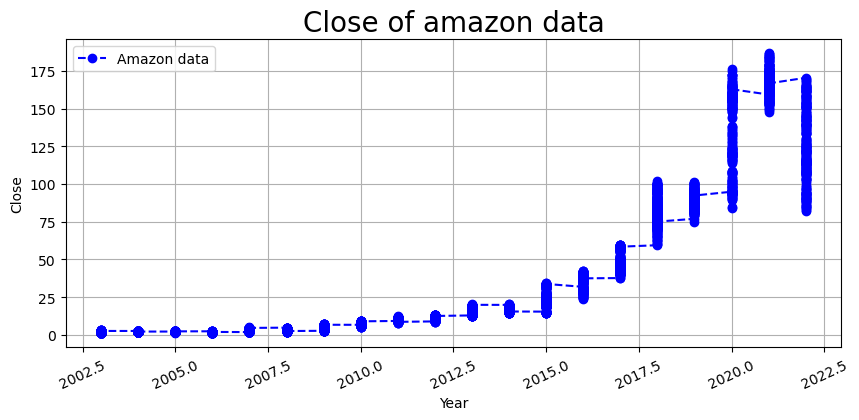

In [17]:
plt.figure(figsize =(10,4))
plt.plot(amazon['Year'], amazon["Close"], color = 'b', linestyle = 'dashed',
         marker = 'o',label = "Amazon data")
  
plt.xticks(rotation = 25)
plt.xlabel('Year')
plt.ylabel('Close')
plt.title('Close of amazon data', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

In [18]:
close_price = amazon[['Adj Close']]

In [19]:
daily_return = close_price.pct_change()

In [20]:
daily_return.fillna(0, inplace=True)

In [21]:
daily_return

,Adj Close
0,0.000000
1,0.048544
2,0.008772
3,0.041063
4,-0.024594
...,...
5029,-0.034344
5030,0.017425
5031,-0.025924
5032,-0.014692


In [22]:
adj_price = amazon['Adj Close']
 
mav = adj_price.rolling(window=50).mean()
 
print(mav[-10:])

5024    100.3704
5025     99.7216
5026     99.1288
5027     98.5592
5028     98.0504
5029     97.4682
5030     96.9226
5031     96.4454
5032     95.8060
5033     95.1624
Name: Adj Close, dtype: float64


<AxesSubplot:>

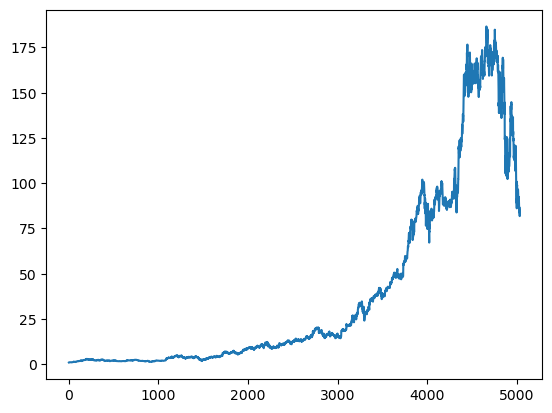

In [23]:
adj_price.plot()

<AxesSubplot:>

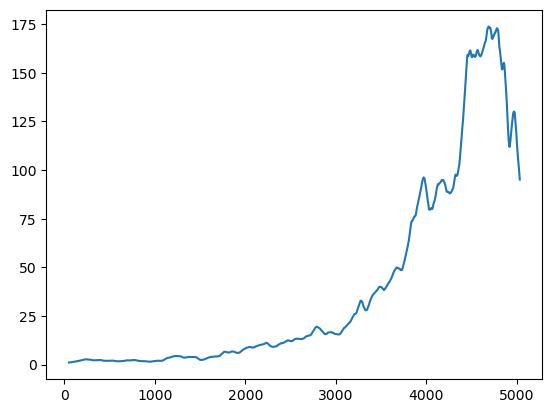

In [24]:
mav.plot()

<AxesSubplot:>

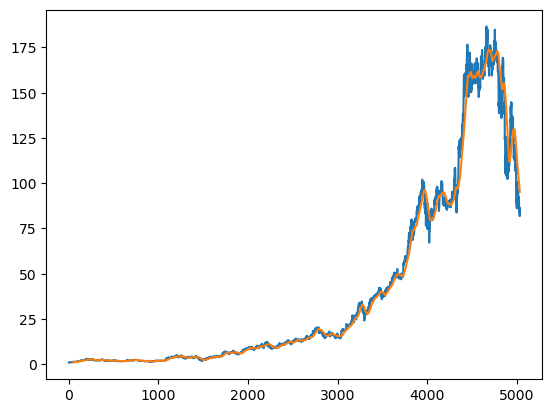

In [25]:
adj_price.plot()
mav.plot()

# Black Scholes Model

In [26]:
r = .04 
S = amazon['Open'] 
K = amazon['Close'] 
T = amazon['Year'] 
sigma = .40 

def blackscholes(r,S,K,T,sigma):
    '''Calculate option (Call or Put) pricing based on given parameters'''
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    try:        
        call = S*norm.cdf(d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(d2, 0, 1)
        print(f'Call price is : {call}')
        put = -(S*norm.cdf(-d1, 0, 1) - K*np.exp(-r*T)*norm.cdf(-d2, 0, 1))
        print(f'Put price is : {put}')
        return call, put        
    except:
        print('Check all the parameters!!!')
        return None, None

In [27]:
blackscholes(r,S,K,T,sigma)

Check all the parameters!!!


(None, None)

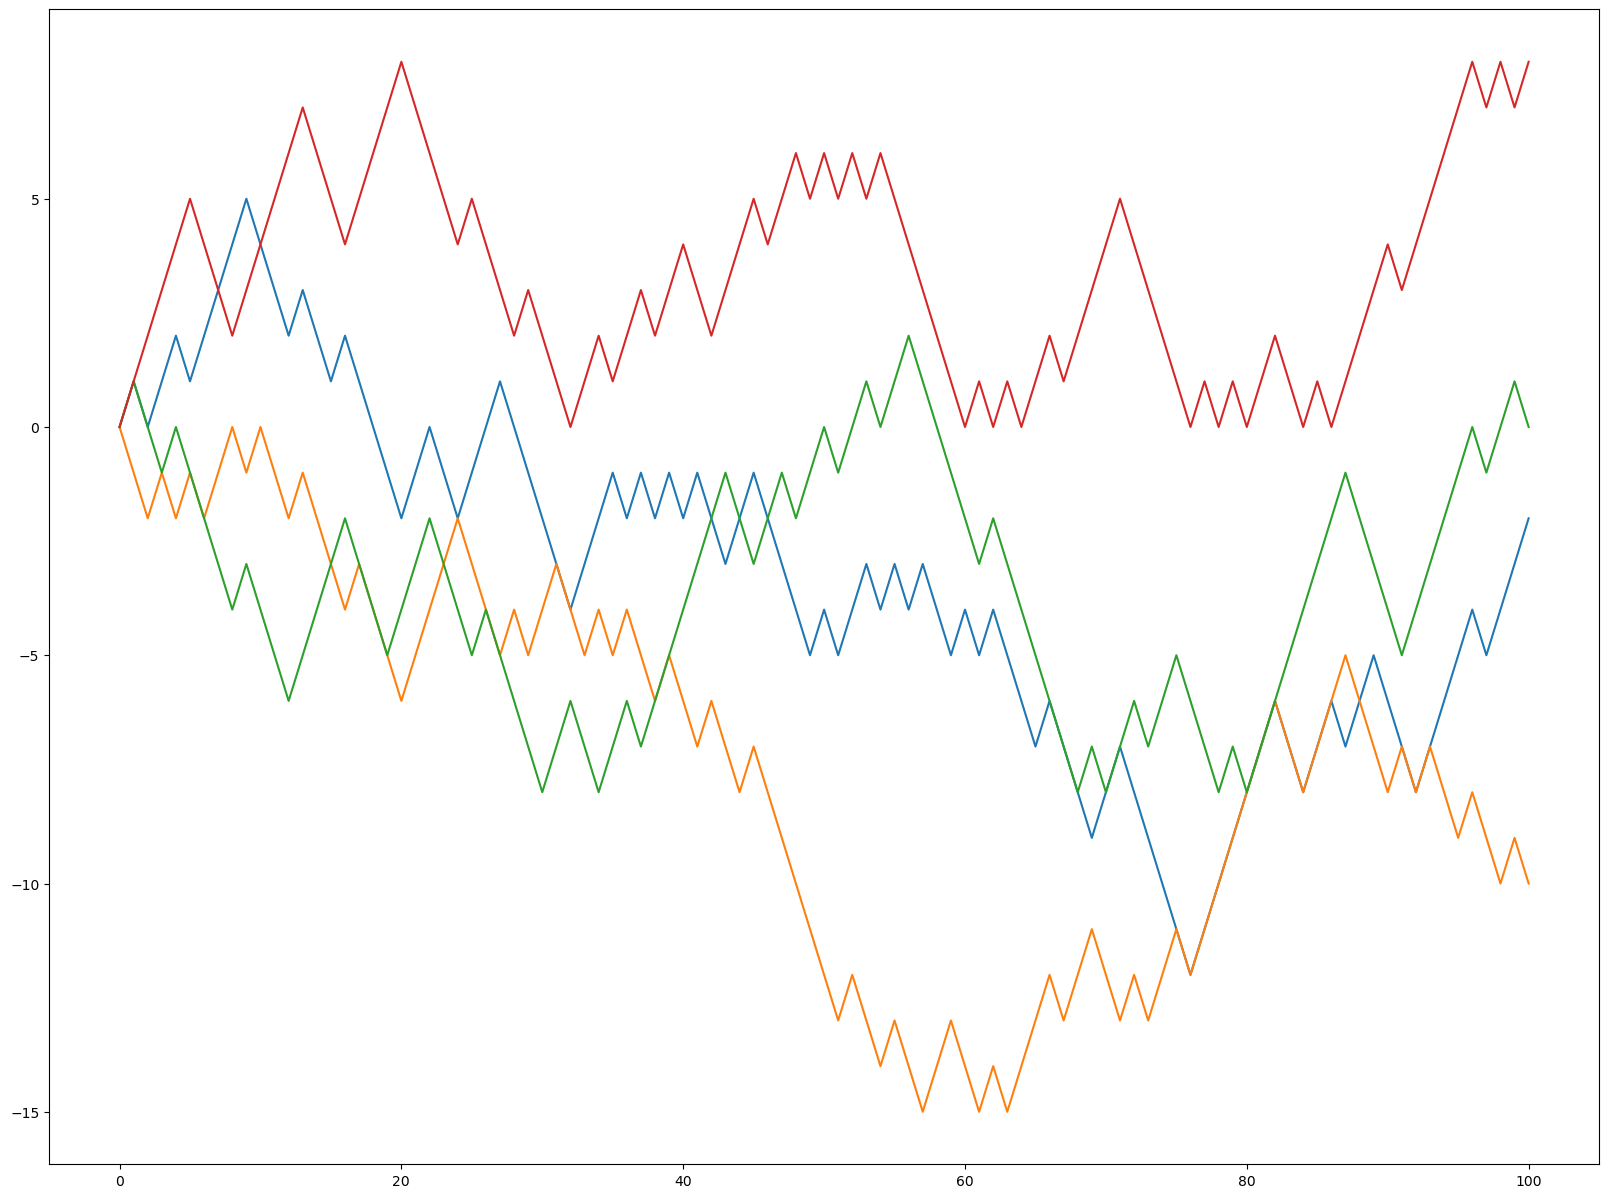

In [28]:
def random_walk():
    n = 100
    d = 4 
    walk = np.zeros(shape=(1,d))
    for _ in range(n):
        walk = np.concatenate((walk, np.random.choice([1,-1], size=(1,d))), axis=0)
    plt.figure(figsize=(20,15))
    plt.plot(range(n+1), np.cumsum(walk, axis=0))
random_walk()

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00588671,  0.00839816,  0.00663487, ...,  0.00729359,
         0.01531696,  0.00674147],
       [-0.00508328,  0.00295522, -0.01096767, ...,  0.0292143 ,
         0.02407606,  0.00584408],
       ...,
       [ 0.60718941,  0.54291537,  1.33292282, ...,  0.05436647,
         0.79560101, -0.26834502],
       [ 0.59644048,  0.55181209,  1.32631818, ...,  0.06532952,
         0.7972217 , -0.27543211],
       [ 0.6020871 ,  0.55989835,  1.33613633, ...,  0.08440779,
         0.80394389, -0.26450021]])

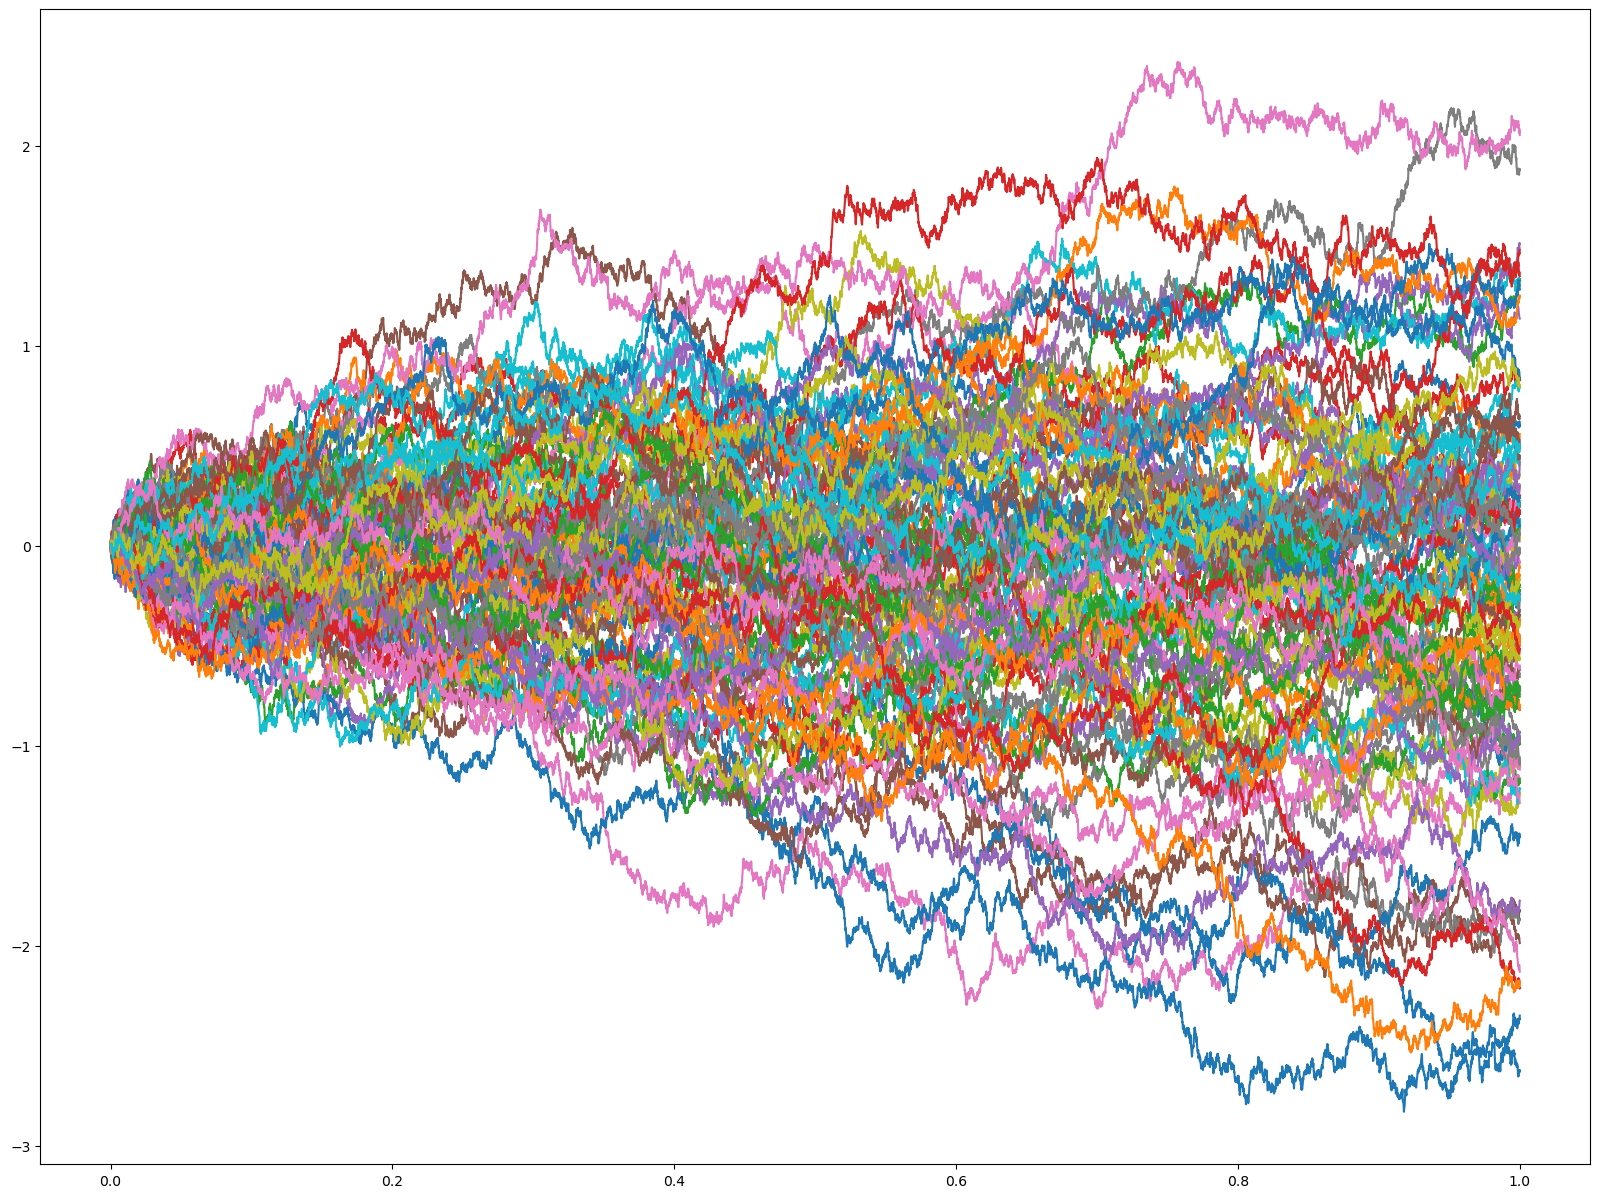

In [29]:
def brownian_motion(m):
    # we want to produce m number of BM's
    n = 10_000
    T = 1
    times = np.linspace(0, T, n)
    dt = times[1] - times[0]
#     print(dt)
    dB = np.sqrt(dt) * np.random.normal(size=(n-1, m))#difference of BM 
    B0 = np.zeros(shape=(1, m))
    B = np.concatenate((B0, np.cumsum(dB, axis=0)), axis=0)
    plt.figure(figsize=(20,15))
    plt.plot(times, B)
    return B
    
brownian_motion(100)

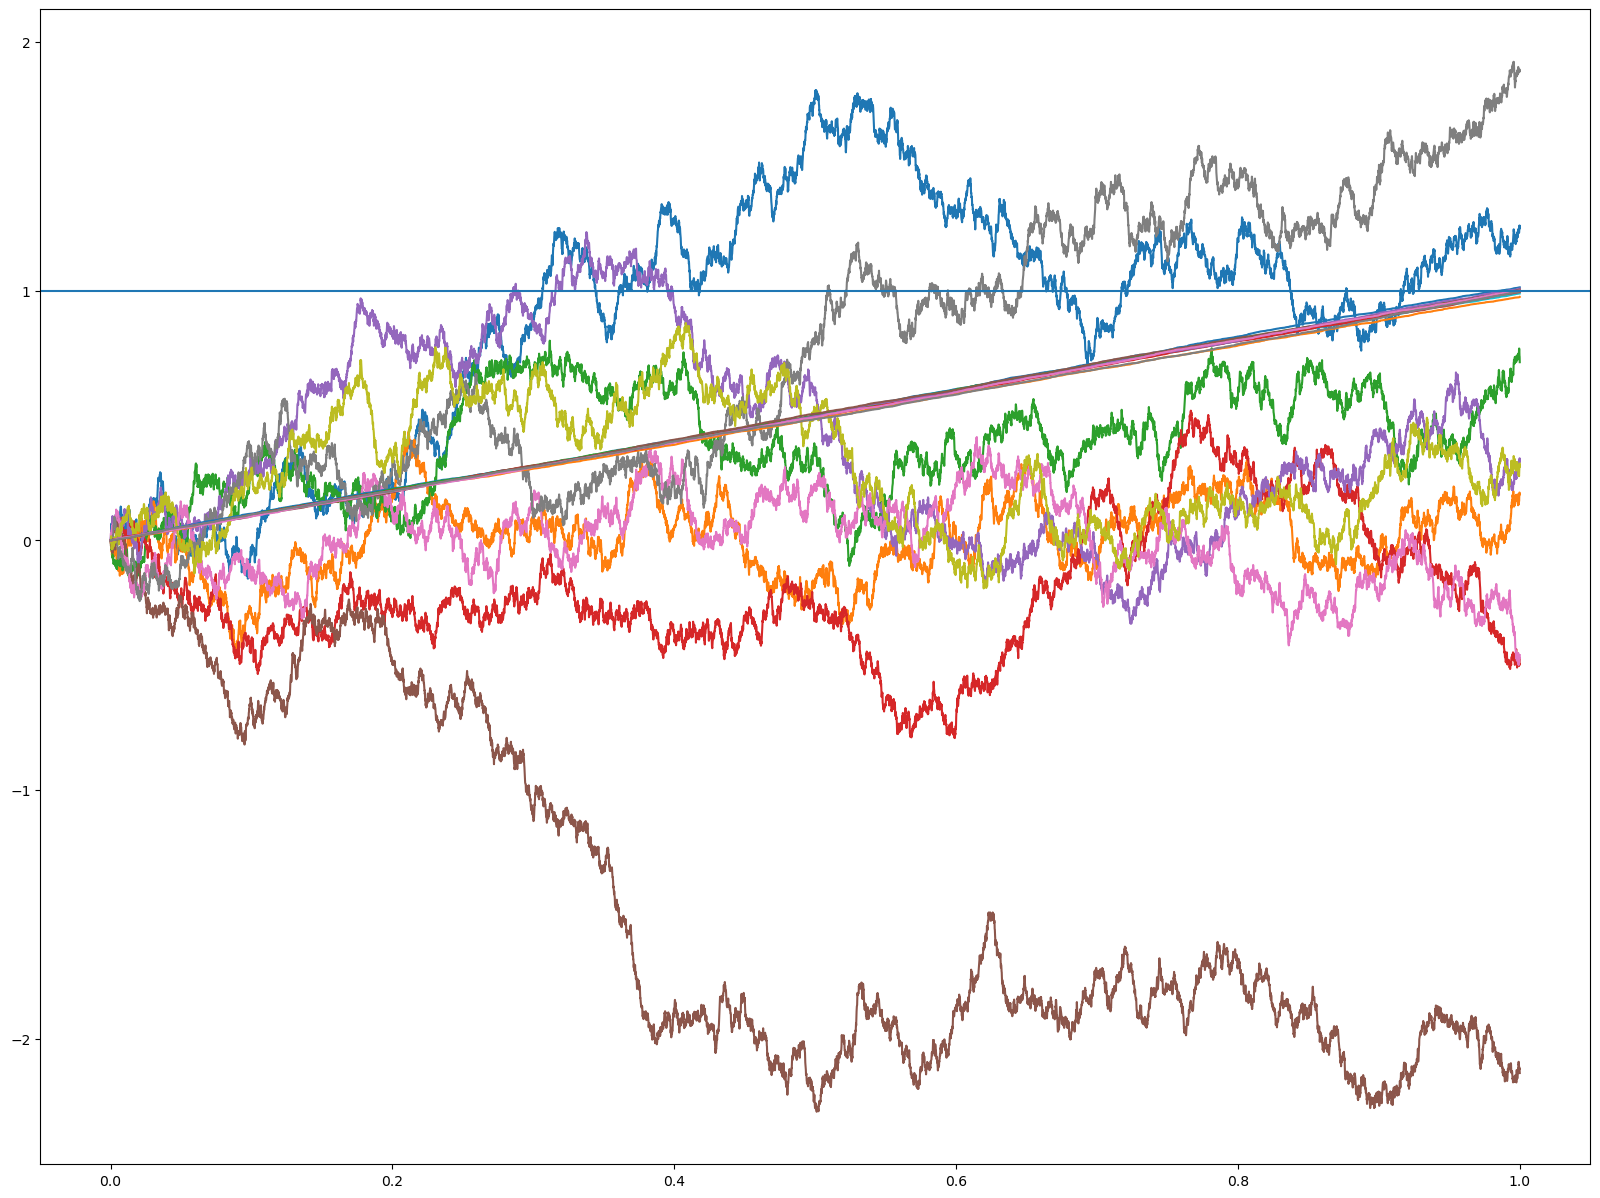

In [30]:
def quadratic_variation(B):
    '''Getting QV for a given BM B'''
    n = 10_000
    T = 1
    times = np.linspace(0, T, n)
    plt.plot(times, np.cumsum(np.power(np.diff(B,axis=0,prepend=0), 2), axis=0))
    plt.axhline(1)
quadratic_variation(brownian_motion(9))

Text(0.5, 1.0, 'Realizations of Geometric Brownian Motion with different variances\n $\\mu=1$')

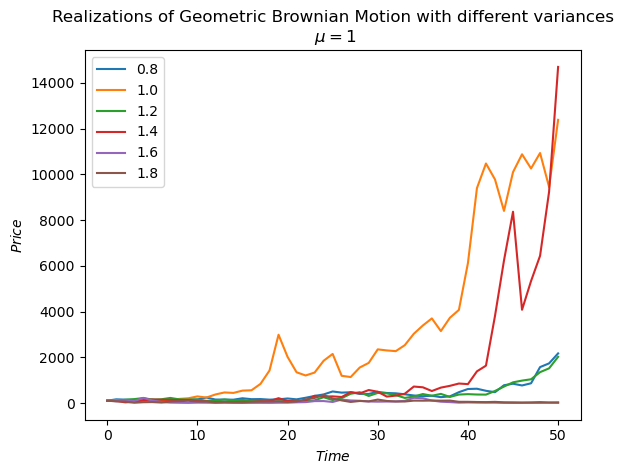

In [41]:
mu = 1
n = 50
dt = 0.1
x0 = 100
np.random.seed(1)

sigma = np.arange(0.8, 2, 0.2)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt
    + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.legend(np.round(sigma, 2))
plt.xlabel("$Time$")
plt.ylabel("$Price$")
plt.title(
    "Realizations of Geometric Brownian Motion with different variances\n $\mu=1$"
)

In [32]:
def call_put_value(r,S,k,u,d,T):
    p = (np.exp(r*T) - d)/(u - d)
    C_T = (S*u - k)*(1 - np.exp(-r*T) * d) / (u - d)
    delta = (S*u - k) / (S*u - S*d)
    B = d*np.exp(-r*T)*(S*u - k)/(u - d)
    P_T = (S*d - k)*(1 - np.exp(-r*T) * u) / (u - d)
    return p, delta, B, C_T, P_T

# Option Pricing based on Black-Scholes

In [33]:
blackschole=call_put_value(12/100, amazon['Open'], amazon['Close'], 24/20, 19/20, amazon['Year'])

In [34]:
blackschole

(0       9.751730e+104
 1       9.751730e+104
 2       9.751730e+104
 3       9.751730e+104
 4       9.751730e+104
             ...      
 5029    9.533955e+105
 5030    9.533955e+105
 5031    9.533955e+105
 5032    9.533955e+105
 5033    9.533955e+105
 Name: Year, Length: 5034, dtype: float64,
 0       0.720792
 1       0.610107
 2       0.741177
 3       0.661738
 4       0.878358
           ...   
 5029    0.880917
 5030    0.703904
 5031    0.890856
 5032    0.847343
 5033    0.736769
 Length: 5034, dtype: float64,
 0       2.694989e-105
 1       2.328694e-105
 2       2.945939e-105
 3       2.685636e-105
 4       3.669175e-105
             ...      
 5029    3.002707e-104
 5030    2.335652e-104
 5031    3.017057e-104
 5032    2.796406e-104
 5033    2.433543e-104
 Length: 5034, dtype: float64,
 0        0.691600
 1        0.597600
 2        0.756000
 3        0.689200
 4        0.941600
           ...    
 5029    75.335980
 5030    58.600000
 5031    75.696002
 5032    70.160016
 

In [35]:
data_in_array = np.array(blackschole)

In [36]:
x, y,z,w,x = data_in_array

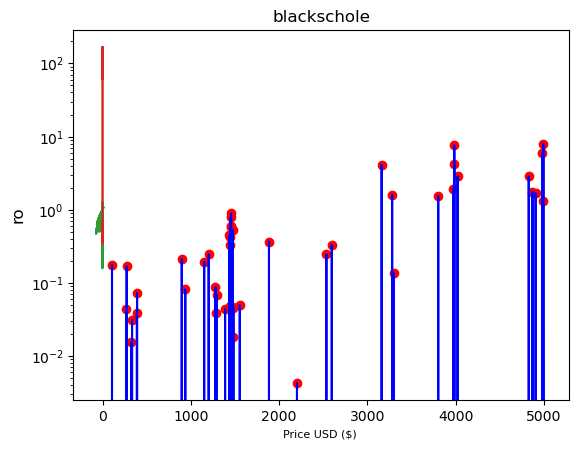

In [39]:
fig, ax = plt.subplots(1,1)
ax.plot(x, y,z,w,x, 'ro')
ax.plot(x, y,z,w,x, 'b-')
ax.set_yscale('log')
plt.title('blackschole')

plt.xlabel('Price USD ($) ', fontsize=8)
plt.ylabel('ro', fontsize=12)
fig.show()


# Heston Model

In [42]:
S0 = amazon['Open'].tail(1)             
T = 2022              
r = 0.02               
N = 252               
M = 1000              
kappa = 3              
theta = 0.20**2        
v0 = 0.25**2          
rho = 0.7             
sigma = 0.6           
theta, v0

(0.04000000000000001, 0.0625)

In [43]:
def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho],
                    [rho,1]])
    S = np.full(shape=(N+1,M), fill_value=S0)
    v = np.full(shape=(N+1,M), fill_value=v0)
    Z = np.random.multivariate_normal(mu, cov, (N,M))
    for i in range(1,N+1):
        S[i] = S[i-1] * np.exp( (r - 0.5*v[i-1])*dt + np.sqrt(v[i-1] * dt) * Z[i-1,:,0] )
        v[i] = np.maximum(v[i-1] + kappa*(theta-v[i-1])*dt + sigma*np.sqrt(v[i-1]*dt)*Z[i-1,:,1],0)
    
    return S, v

In [44]:
rho_p = 0.98
rho_n = -0.98
S_p,v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma,T, N, M)
S_n,v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma,T, N, M)

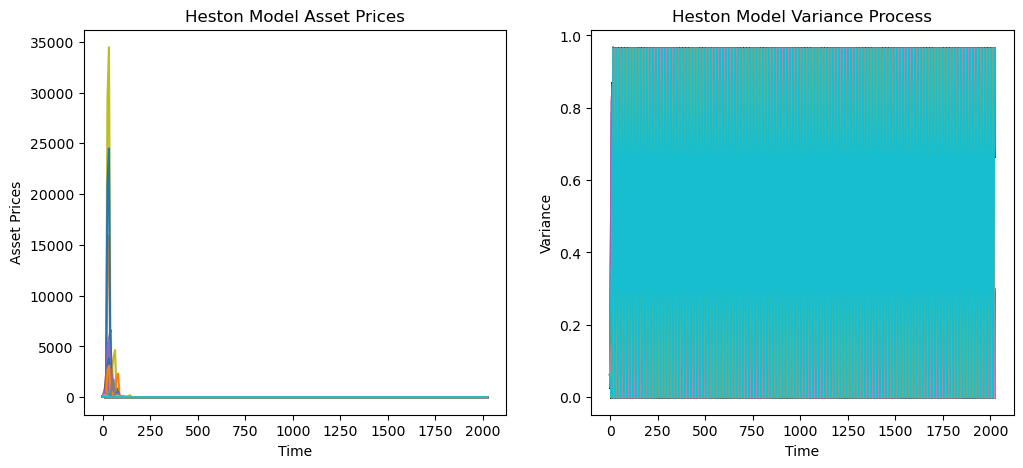

In [45]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')
ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')
plt.show()

In [46]:
!pip install py_vollib_vectorized

In [47]:
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

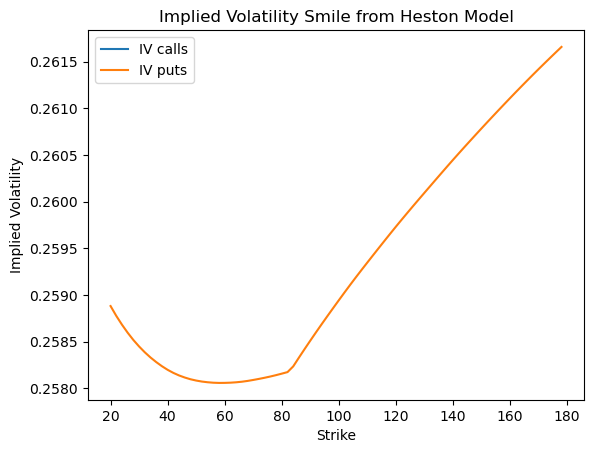

In [48]:
rho = -0.7
S,v = heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M)
K = np.arange(20,180,2)
puts = np.array([np.exp(-r*T)*np.mean(np.maximum(k-S,0)) for k in K])
calls = np.array([np.exp(-r*T)*np.mean(np.maximum(S-k,0)) for k in K])
put_ivs = implied_vol(puts, S0, K, T, r, flag='p', q=0, return_as='numpy', on_error='ignore')
call_ivs = implied_vol(calls, S0, K, T, r, flag='c', q=0, return_as='numpy')
plt.plot(K, call_ivs, label=r'IV calls')
plt.plot(K, put_ivs, label=r'IV puts')
plt.ylabel('Implied Volatility')
plt.xlabel('Strike')
plt.title('Implied Volatility Smile from Heston Model')
plt.legend()
plt.show()

# LSTM to measure RMSE

In [49]:
amazon.set_index('Date',drop=True,inplace=True) 

In [50]:
Ms = MinMaxScaler()
amazon[amazon.columns] = Ms.fit_transform(amazon)

In [51]:
X = amazon[["Open", "High", "Low", "Adj Close", "Volume"]]
y = amazon['Close']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 121)

In [53]:
lstm = Sequential()
lstm.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
lstm.add(LSTM(64, return_sequences=False))
lstm.add(Dense(25))
lstm.add(Dense(1))

# Compile the model
lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4027/4027 [==============================] - 14s 3ms/step - loss: 0.0013
Epoch 2/5
4027/4027 [==============================] - 12s 3ms/step - loss: 3.6524e-04
Epoch 3/5
4027/4027 [==============================] - 12s 3ms/step - loss: 4.6138e-04
Epoch 4/5
4027/4027 [==============================] - 12s 3ms/step - loss: 2.0874e-04
Epoch 5/5
4027/4027 [==============================] - 12s 3ms/step - loss: 1.3053e-04


In [54]:
lstm_predictions = lstm.predict(X_test)

32/32 [==============================] - 1s 2ms/step


In [55]:
y_test=np.array(y_test)

In [56]:
y_test

array([0.83102456, 0.0040492 , 0.14849509, ..., 0.00492478, 0.04471098,
       0.01290735])

In [57]:
lstm_predictions

array([[0.8298118 ],
       [0.01150689],
       [0.14934847],
       ...,
       [0.01157203],
       [0.04992417],
       [0.01811323]], dtype=float32)

In [58]:
rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
rmse

0.37986947849923713